### Step 0: import data

In [58]:
energy_folder = "/work/zeng/yinglu/project/cai/example/Ru-extra"

In [60]:
absorbate_file = energy_folder + "/absorbate.dat"

In [61]:
molecule_file = energy_folder + "/molecule.dat"

In [62]:
import pandas as pd

In [63]:
E_absorbate = pd.read_csv(absorbate_file, header=None, names=['absorbate', 'E_internal', 'E_correct'], sep=" ")

In [64]:
E_absorbate.index = E_absorbate["absorbate"]

In [65]:
E_absorbate

,absorbate,E_internal,E_correct
absorbate,,,
Surface_O1,Surface_O1,-356.50144,0.101688
Surface_OH1,Surface_OH1,-361.29255,0.382034
Surface_OOH1,Surface_OOH1,-365.74027,0.380738
Surface,Surface,-350.81581,0.000000


In [66]:
E_absorbate["E_Gibbs"] = E_absorbate["E_internal"] + E_absorbate["E_correct"]

In [67]:
E_absorbate

,absorbate,E_internal,E_correct,E_Gibbs
absorbate,,,,
Surface_O1,Surface_O1,-356.50144,0.101688,-356.399752
Surface_OH1,Surface_OH1,-361.29255,0.382034,-360.910516
Surface_OOH1,Surface_OOH1,-365.74027,0.380738,-365.359532
Surface,Surface,-350.81581,0.000000,-350.815810


In [68]:
E_molecule = pd.read_csv(molecule_file, header=None, names=['molecule', 'E_internal', 'E_correct'], sep=" ")

In [69]:
E_molecule.index = E_molecule["molecule"]

In [70]:
E_molecule

,molecule,E_internal,E_correct
molecule,,,
H2,H2,-6.772417,-0.044675
H2O,H2O,-14.234034,0.086938


In [71]:
E_molecule["E_Gibbs"] = E_molecule["E_internal"] + E_molecule["E_correct"]

In [72]:
E_molecule

,molecule,E_internal,E_correct,E_Gibbs
molecule,,,,
H2,H2,-6.772417,-0.044675,-6.817092
H2O,H2O,-14.234034,0.086938,-14.147096


In [73]:
E_substrate=E_absorbate.loc["Surface", "E_Gibbs"]

In [74]:
E_substrate

-350.81581

In [75]:
2*-14.22-2*-6.8-(-9.92)

-4.920000000000002

### Step 1: Calculate G for each intermediate

In [76]:
E_H2 = E_molecule.loc["H2","E_Gibbs"]

In [77]:
# using the thermal enthalpy of -4.92 to calculate the O2's Gibbs energy
E_O2 = 2*E_molecule.loc["H2O","E_Gibbs"]-2*E_molecule.loc["H2","E_Gibbs"]-(-4.92)

In [78]:
E_O2

-9.740008999999999

In [79]:
E_H2O = E_molecule.loc["H2O","E_Gibbs"]

# \Delta E

In [80]:
E_substrate_H2O = E_substrate + 2*E_H2O

In [81]:
E_substrate_H2O

-379.110002

In [82]:
E_absorbate

,absorbate,E_internal,E_correct,E_Gibbs
absorbate,,,,
Surface_O1,Surface_O1,-356.50144,0.101688,-356.399752
Surface_OH1,Surface_OH1,-361.29255,0.382034,-360.910516
Surface_OOH1,Surface_OOH1,-365.74027,0.380738,-365.359532
Surface,Surface,-350.81581,0.000000,-350.815810


In [83]:
E_absorbate.loc["Surface_O1", "E_Gibbs_relative"] = E_absorbate.loc["Surface_O1","E_Gibbs"]  + E_H2 + E_H2O - E_substrate_H2O

In [84]:
#E_absorbate.loc["11H", "E_Gibbs_relative"] = E_absorbate.loc["11H","E_Gibbs"] + (E_H + E_O + E_H2O) 

In [85]:
E_absorbate.loc["Surface_OH1", "E_Gibbs_relative"] = E_absorbate.loc["Surface_OH1","E_Gibbs"] + (1.0/2.0*E_H2 )+E_H2O - E_substrate_H2O

In [86]:
E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"] = E_absorbate.loc["Surface_OOH1","E_Gibbs"] + (3.0/2.0*E_H2) - E_substrate_H2O

In [87]:
E_substrate_H2O_final = E_substrate + 2*E_H2+ E_O2 - E_substrate_H2O

In [88]:
E_substrate_H2O_final

4.920000000000016

In [89]:
E_absorbate

,absorbate,E_internal,E_correct,E_Gibbs,E_Gibbs_relative
absorbate,,,,,
Surface_O1,Surface_O1,-356.50144,0.101688,-356.399752,1.746063
Surface_OH1,Surface_OH1,-361.29255,0.382034,-360.910516,0.643844
Surface_OOH1,Surface_OOH1,-365.74027,0.380738,-365.359532,3.524833
Surface,Surface,-350.81581,0.000000,-350.815810,NaN


In [90]:
E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"]-E_absorbate.loc["Surface_O1", "E_Gibbs_relative"]-1.23

0.5487702499999796

In [91]:
E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"]-E_absorbate.loc["Surface_O1", "E_Gibbs_relative"]

1.7787702499999796

In [92]:
E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"]-E_absorbate.loc["Surface_OH1", "E_Gibbs_relative"]

2.880988500000001

### Step 2: plot figures

In [93]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()

In [94]:
diagram.add_level(0,'*', top_text='')

In [95]:
diagram.add_level(E_absorbate.loc["Surface_OH1", "E_Gibbs_relative"],'*OH', top_text='')

In [96]:
diagram.add_level(E_absorbate.loc["Surface_O1", "E_Gibbs_relative"],'*O', top_text='')

In [97]:
diagram.add_level(E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"],'*OOH', top_text='')

In [98]:
diagram.add_level(E_substrate_H2O_final,'* + O2', top_text='')

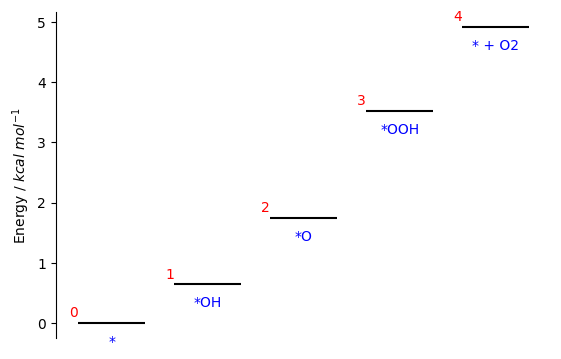

In [99]:
diagram.plot(show_IDs=True)

In [100]:
diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.add_link(2,3)
diagram.add_link(3,4)

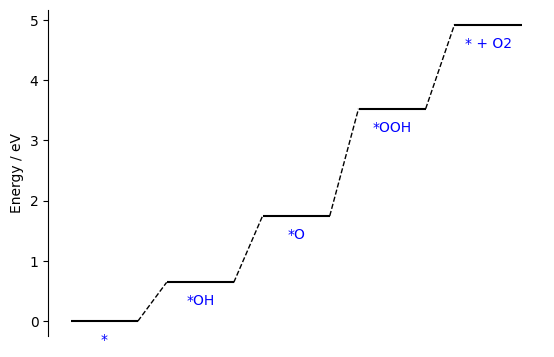

In [101]:
diagram.plot(ylabel="Energy / eV")

In [102]:
diagram.fig.savefig(energy_folder + "/SAC_OER_Pt-O.png")

In [103]:
### Step 3: add electric field

In [104]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()

In [105]:
diagram.add_level(0,'*', top_text='')

In [106]:
diagram.add_level(E_absorbate.loc["Surface_OH1", "E_Gibbs_relative"]-1.23,'*OH', top_text='')

In [107]:
diagram.add_level(E_absorbate.loc["Surface_O1", "E_Gibbs_relative"]-1.23*2,'*O', top_text='')

In [108]:
diagram.add_level(E_absorbate.loc["Surface_OOH1", "E_Gibbs_relative"]-1.23*3,'*OOH', top_text='')

In [109]:
diagram.add_level(E_substrate_H2O_final-1.23*4,'* + O2', top_text='')

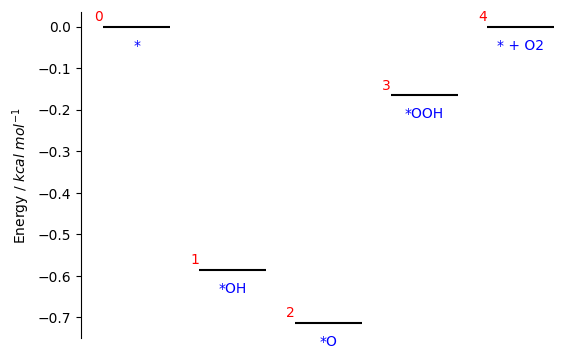

In [110]:
diagram.plot(show_IDs=True)

In [111]:
diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.add_link(2,3)
diagram.add_link(3,4)

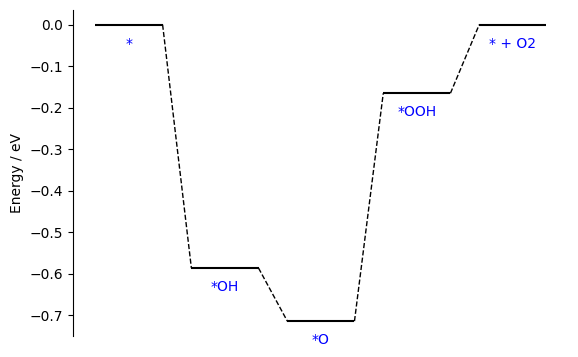

In [112]:
diagram.plot(ylabel="Energy / eV")

In [113]:
diagram.fig.savefig(energy_folder + "/SAC_OER_Pt-O_over_p.png")